### 11. 다변량 자료 탐색

`-` 별 그림(star plot)

> 

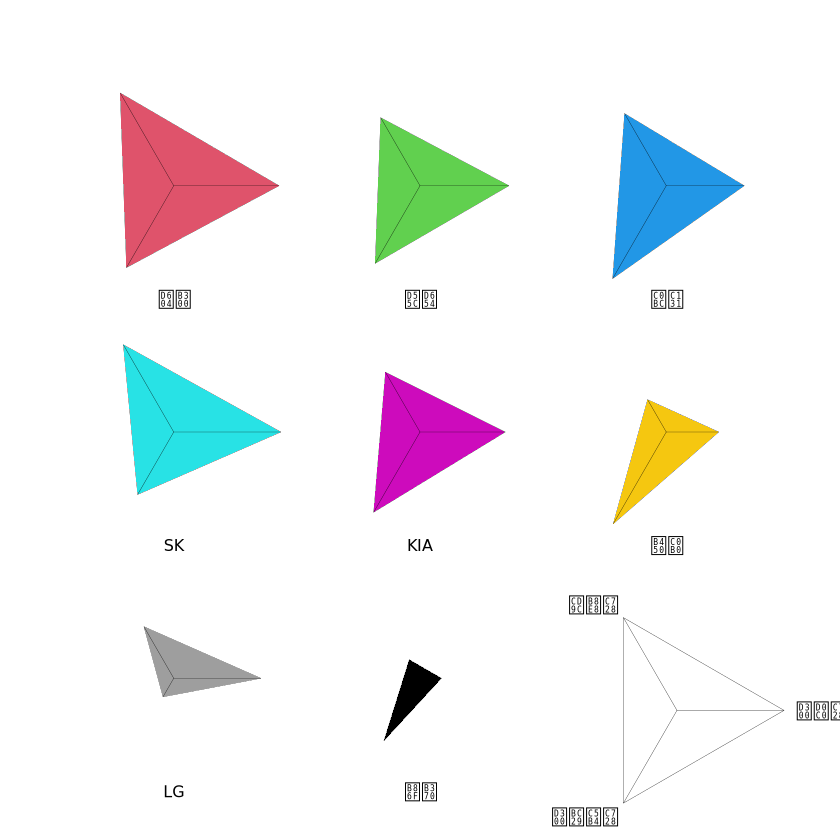

In [20]:
baseball = read.csv("~/R/EDA/data/프로야구 20060602.csv", header = T, encoding = "UTF-8", fileEncoding = "CP949")
x = baseball[, 2:4]

for (i in 1:2) {
    x[i] = 0.2 + 0.8*(x[i] - min(x[i]))/(max(x[i]) - min(x[i]))
}

x[3] = 0.2 + 0.8*(max(x[3]) - x[3])/(max(x[3]) - min(x[3]))  ## 낮을수록 좋으므로 역으로 바꿈.
rownames(x) = baseball[,1]
stars(x, scale = F, key.loc = c(7, 2), col.stars = 2:9)

`-` 산점도 행렬

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 5):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 6):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 7):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species


The following objects are masked from iris (pos = 8):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species




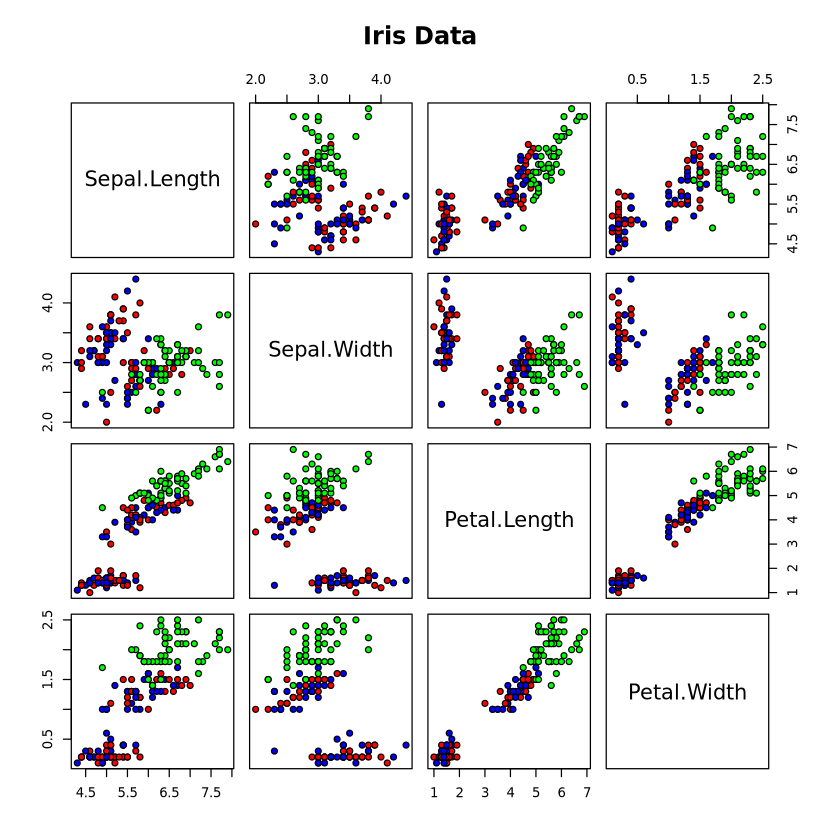

In [62]:
data(iris)
attach(iris)
pairs(iris[1:4], main = "Iris Data", pch = 21, bg = c("red", "green", "blue")[labs])  ## 좀 잘못됨

`-` 조건부 플롯

> X와 Y의 관계를 조건 Z에 따라 관찰.

In [63]:
library(lattice)
data(quakes)
attach(quakes)

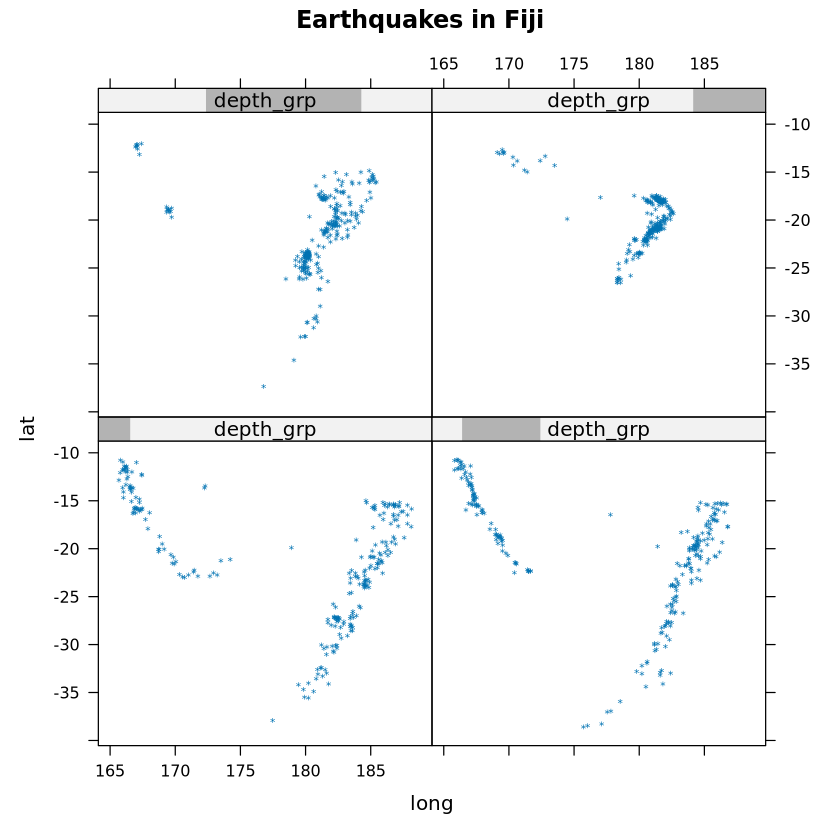

In [64]:
depth_grp = equal.count(depth, number = 4, overlap = 0)
xyplot(lat ~ long | depth_grp, main = "Earthquakes in Fiji", pch = "*")  ## 조건부 플롯이라고 연산자도 이렇게 해놨네.

`-` 평행좌표 플롯과 변수 순서화

> 대략적인 관계를 봄. 이런것도 있다. 엇갈리면 음의 상관, 나란히 나오면 양의 상관.

`-` 주성분 분석 PCA

상관관계가 없는 몇 개의 주성분을 가지고 결과를 해석할 수 있다.

`princomp(x, cor = T)`

> 주성분 분석에 의한 관측개체, 변수에 대한 플롯을 그리고 둘을 결합하여 주성분 행렬도를 그릴 수 있다.

In [67]:
protein = read.table("~/R/EDA/data/protein.txt", header = T)

In [72]:
pcan = princomp(protein[, 2:10], cor = T)

In [74]:
pcan$loadings
pcan$scores


Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Beef     0.303         0.298  0.646  0.322  0.460  0.150         0.246
Chicken  0.311  0.237 -0.624        -0.300  0.121                0.592
Egg      0.427        -0.182  0.313        -0.361 -0.443  0.491 -0.333
Milk     0.378  0.185  0.386        -0.200 -0.618  0.462         0.178
Fish     0.136 -0.647  0.321 -0.216 -0.290  0.137 -0.106  0.449  0.313
Cereal  -0.438  0.233                0.238         0.405  0.703  0.152
Potato   0.297 -0.353 -0.243 -0.337  0.736 -0.148  0.153 -0.115  0.122
Bean    -0.420 -0.143         0.330  0.151 -0.447 -0.407 -0.184  0.518
Fruit   -0.110 -0.536 -0.408  0.462 -0.234 -0.119  0.450        -0.203

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9
-3.5572381,1.66410153,1.797551168,0.2343937,0.02373348,1.05559205,-0.48146963,-0.77725500,-0.10538241
1.4520059,1.06270224,-1.365390393,0.1715636,-0.95269493,-0.22293225,-0.18488970,0.25617834,-0.22193021
1.6554798,-0.16278449,-0.220999548,0.5314638,0.77066090,0.29578109,-0.19963008,0.20750420,-0.03385548
-3.1987084,1.32789455,-0.154409266,0.2186061,-0.49474117,0.70992125,0.47436659,0.82491125,-0.30604626
0.3781039,0.61509588,-1.220603019,-0.4735497,0.26211969,0.84006319,0.32144287,-0.01255168,-0.15252999
2.4140424,-0.29133192,0.767775590,-0.9872885,-0.76794882,0.17384197,-0.23047238,0.63382669,0.49018312
1.4515379,-0.45958638,-1.329399490,-1.1593857,0.43166418,0.66168115,-0.56622280,0.16654203,-0.26526065
1.5961042,0.60829255,2.091769672,-1.4444931,0.03797025,-0.85140217,0.74120587,-0.23057607,-0.13583421
1.5186657,-0.80155997,-0.001921431,1.9978218,0.25562334,0.91748533,0.96599215,0.02267825,0.55481732
-2.2858842,-1.02170143,0.900803315,1.8313202,-0.41332823,-1.16807665,-0.15042998,0.31213712,0.39596533
